In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential

In [96]:
df = pd.read_csv(r"DataSets\train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


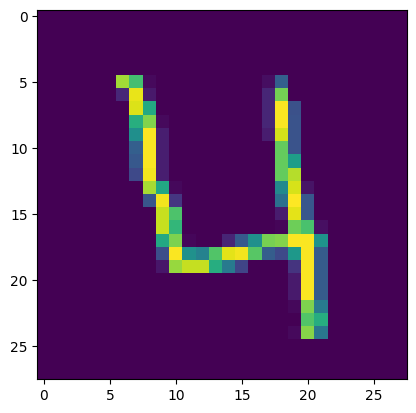

In [97]:
img1 = np.reshape(df.iloc[3,1:],(28,28))
plt.imshow(img1)
plt.show()

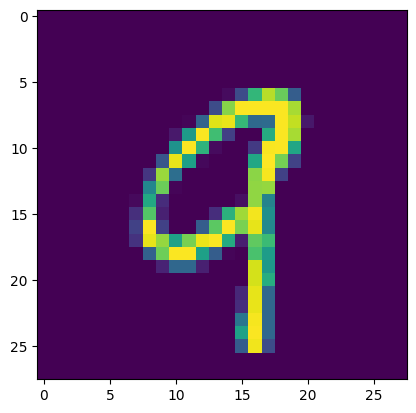

In [98]:
img1 = np.reshape(df.iloc[41999,1:],(28,28))
plt.imshow(img1)
plt.show()

In [99]:
x = df.drop(columns=["label"])
y = df["label"]

In [100]:
x /= 255

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [102]:
model = Sequential([Input((784,)),
                    Dense(16,activation="relu"),
                    Dense(32,activation="relu"),
                    Dense(64,activation="relu"),
                    Dense(10,activation="softmax")])

In [103]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,866 (61.98 KB)

 Trainable params: 15,866 (61.98 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [105]:
model.fit(x_train,y_train,epochs=15,batch_size=1000)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2662 - loss: 2.1489
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6604 - loss: 1.2013
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8214 - loss: 0.6095
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8752 - loss: 0.4328
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8980 - loss: 0.3483
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9140 - loss: 0.2999
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9187 - loss: 0.2825
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9246 - loss: 0.2601
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9313 - loss: 0.2370
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9330 - loss: 0.2261
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.2123
Epoch 12/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - lo

In [106]:
pred = model.predict(x_test)

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [107]:
y_pred = np.argmax(pred,axis=1)
y_pred

array([4, 4, 6, ..., 3, 3, 9])

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1214
           1       0.97      0.97      0.97      1362
           2       0.92      0.92      0.92      1213
           3       0.94      0.90      0.92      1287
           4       0.92      0.95      0.93      1276
           5       0.92      0.90      0.91      1168
           6       0.96      0.96      0.96      1227
           7       0.96      0.95      0.95      1313
           8       0.90      0.93      0.91      1250
           9       0.93      0.91      0.92      1290

    accuracy                           0.94     12600
   macro avg       0.94      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600

